In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as mkr

In [2]:
#Задание №1
X,y = mkr.make_regression(n_samples=20, n_features=3)
X.shape

(20, 3)

In [3]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [4]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])    
    n = X.shape[1]
    errors = []
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        
        err = calc_mse(y, y_pred)
        errors.append(err)
        W -= (alpha * (1/n * 2 * np.dot(X, (y_pred - y))))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W, errors

In [5]:
W, grad_errors = eval_model(X.T, y, iterations=10000, alpha=1e-3)

1000 [15.64655478 23.7807726   6.23491141] 34.92995518326326
2000 [18.1741887  27.92038114  8.1981565 ] 1.2855567413155224
3000 [18.5579131  28.69475676  8.71568928] 0.053804790089161315
4000 [18.6109746  28.84480922  8.84784989] 0.0025543405405168335
5000 [18.61694514 28.8749275   8.88105319] 0.00013368450093688872
6000 [18.61720925 28.8811856   8.88931706] 7.446366156789066e-06
7000 [18.61707033 28.88252895  8.89136189] 4.295513496482155e-07
8000 [18.61700178 28.88282581  8.89186597] 2.5235481509212152e-08
9000 [18.61697915 28.88289304  8.89198992] 1.496151434014485e-09
10000 [18.61697262 28.88290857  8.89202034] 8.910153823787088e-11


In [6]:
def eval_sgd_model(X, y, iterations, qty_in_batch=1, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    errors = []
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)

            # print(b, n_batch, start_, end_)

            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        errors.append(err)
        if i % (iterations / 10) == 0:
            print(i, W, err, len(errors))
    return W, errors

In [7]:
W_sgd, errors_sgd = eval_sgd_model(X.T, y, iterations=10000, qty_in_batch=1, alpha=1e-3)

1000 [15.83987359 23.63770584  5.89072224] 114.03489549052246 1000
2000 [18.2112969  27.88589112  8.11008532] 3.7420196394272214 2000
3000 [18.56577096 28.68601058  8.69374768] 0.12735451217392044 3000
4000 [18.61274223 28.84258368  8.84243037] 0.004547637050471516 4000
5000 [18.61735735 28.87436553  8.87971811] 0.00017200077059360125 5000
6000 [18.61730747 28.88104484  8.88898839] 6.934544416308394e-06 6000
7000 [18.61709404 28.88249391  8.89128099] 2.9870398199972057e-07 7000
8000 [18.61700755 28.88281712  8.89184605] 1.3717311777969234e-08 8000
9000 [18.61698056 28.88289089  8.89198501] 6.676110992650865e-10 9000
10000 [18.61697296 28.88290804  8.89201913] 3.4148677744445405e-11 10000


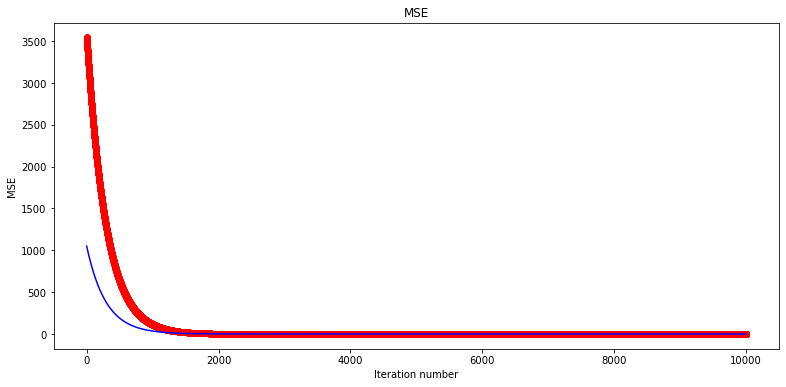

In [8]:
plt.figure(figsize=(13, 6))
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.plot(grad_errors, c = 'b', label = 'grad_errors')
plt.scatter( np.arange(0, len(errors_sgd)) , errors_sgd, c = 'r')


In [9]:
 #Скорость сходимости у стохастического градиентного спуска выше, чем у обычного. Особенно эта разница заметна на первых шагах итераций

In [10]:
#Задание2

In [11]:
def calc_mse_L2(y, y_pred, W, lambda_value):
    penalty = lambda_value * np.dot(W,W)
    return calc_mse(y, y_pred) + penalty


In [12]:
def eval_model_L2(X, y, iterations, alpha=1e-4, lambda_value=1):
    W = np.random.randn(X.shape[0])    
    n = X.shape[1]
    errors = []
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        
        err = calc_mse_L2(y, y_pred, W, lambda_value)
        errors.append(err)
        W -= (alpha * (1/n * 2 * np.dot(X, (y_pred - y))))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W, errors

In [13]:
W, grad_errors_L2 = eval_model_L2(X.T, y, iterations=10000, alpha=1e-3, lambda_value=1)

1000 [15.52329546 23.89770962  6.57986858] 888.2445115645459
2000 [18.14569237 27.95168983  8.28179596] 1180.2057528160742
3000 [18.55127501 28.70282145  8.73605867] 1244.3425309176337
4000 [18.60941186 28.84684611  8.85282017] 1256.8204013235534
5000 [18.61657365 28.87543618  8.88226708] 1259.261427758281
6000 [18.61712025 28.88131176  8.88961367] 1259.7523714811455
7000 [18.61704888 28.8825601   8.89143439] 1259.8543499459788
8000 [18.61699659 28.88283347  8.89188369] 1259.8762175875831
9000 [18.61697789 28.88289492  8.89199425] 1259.8810442655151
10000 [18.61697231 28.88290903  8.8920214 ] 1259.8821362572755


In [14]:
def eval_sgd_model_L2(X, y, iterations, qty_in_batch=1, alpha=1e-4, lambda_value = 1):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    errors = []
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)

            # print(b, n_batch, start_, end_)

            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse_L2(y_tmp, y_pred_tmp, W, lambda_value)
            
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        errors.append(err)
        if i % (iterations / 10) == 0:
            print(i, W, err, len(errors))
    return W, errors

In [15]:
W_sgd, errors_sgd_L2 = eval_sgd_model_L2(X.T, y, iterations=10000, qty_in_batch=1, alpha=1e-3, lambda_value = 1)

1000 [15.73201993 23.61389539  6.05854543] 958.233898615993 1000
2000 [18.18859062 27.88794252  8.14875344] 1178.7454076562838 2000
3000 [18.56103226 28.68765749  8.70294252] 1243.359026362671 3000
4000 [18.6117384  28.8431641   8.84464739] 1256.5564403350434 4000
5000 [18.61713964 28.87453618  8.88025612] 1259.195689144279 5000
6000 [18.61725907 28.88109133  8.88911938] 1259.736190186921 6000
7000 [18.61708303 28.88250607  8.89131294] 1259.8503773375085 7000
8000 [18.617005   28.88282023  8.89185385] 1259.8752430354582 8000
9000 [18.61697996 28.88289167  8.89198692] 1259.8808052364946 9000
10000 [18.61697282 28.88290824  8.8920196 ] 1259.8820776276407 10000


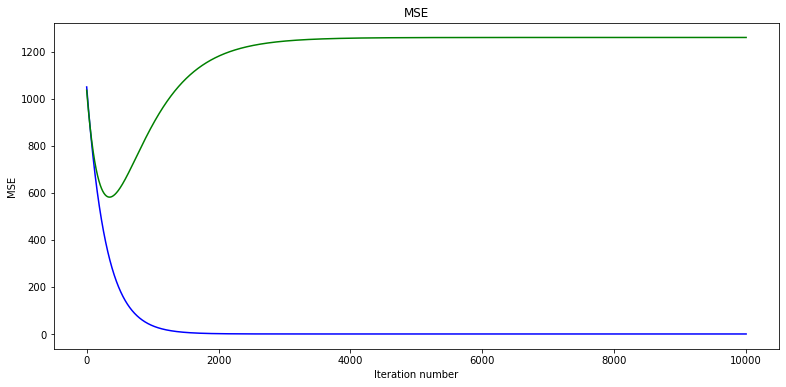

In [16]:
plt.figure(figsize=(13, 6))
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.plot(grad_errors, c = 'b')
plt.plot(grad_errors_L2, c = 'g')

In [17]:
#Для L2 значение MSE достигает минимума на более ранней итерации (значение итерации порядка 200), чем для обычного градиентного спуска

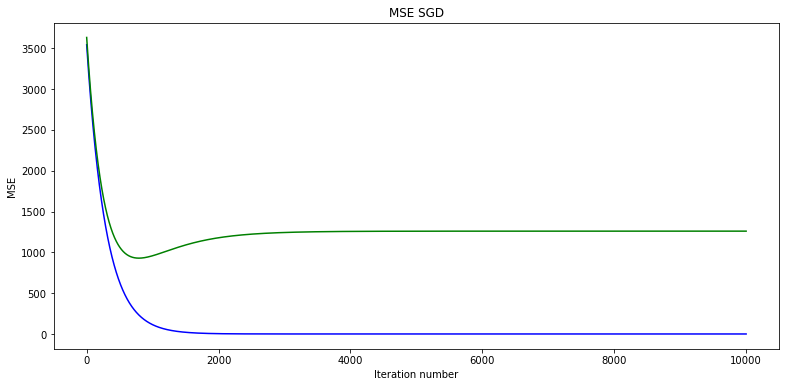

In [18]:
plt.figure(figsize=(13, 6))
plt.title('MSE SGD')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.plot(errors_sgd, c = 'b')
plt.plot(errors_sgd_L2, c = 'g')

In [19]:
#Для стохастического градиентного спуска алогоритм с L2 регулиризацией достигает минимума на более ранней итерации

In [20]:
#Упражнение 3

In [21]:
def calc_mse_L1(y, y_pred, W, lambda_value):
    penalty = lambda_value * np.sum(np.abs(W))
    return calc_mse(y, y_pred) + penalty

In [22]:
def eval_model_L1(X, y, iterations, alpha=1e-4, lambda_value=1):
    W = np.random.randn(X.shape[0])    
    n = X.shape[1]
    errors = []
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        
        err = calc_mse_L1(y, y_pred, W, lambda_value)
        errors.append(err)
        W -= (alpha * (1/n * 2 * np.dot(X, (y_pred - y))))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W, errors

In [27]:
def eval_sgd_model_L1(X, y, iterations, qty_in_batch=1, alpha=1e-4, lambda_value = 1):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    errors = []
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)

            # print(b, n_batch, start_, end_)

            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse_L1(y_tmp, y_pred_tmp, W, lambda_value)
            
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        errors.append(err)
        if i % (iterations / 10) == 0:
            print(i, W, err, len(errors))
    return W, errors

In [28]:
W, grad_errors_L1 = eval_model_L1(X.T, y, iterations=10000, alpha=1e-3, lambda_value=1)

1000 [15.80557573 23.7326403   6.01708076] 80.81976705787795
2000 [18.20437625 27.90644676  8.14334573] 55.58714123711565
3000 [18.56406531 28.69073557  8.70220267] 56.014033117326356
4000 [18.61229212 28.84370008  8.84455346] 56.30321776550109
5000 [18.61723753 28.87463302  8.88024872] 56.37223915199403
6000 [18.61727587 28.88110948  8.88912073] 56.38750794615431
7000 [18.6170858  28.88250962  8.89131396] 56.39090840294394
8000 [18.61700543 28.88282096  8.89185426] 56.39168033501687
9000 [18.61698002 28.88289183  8.89198706] 56.39185882485047
10000 [18.61697282 28.88290827  8.89201964] 56.39190072030951


In [29]:
W_sgd, errors_sgd_L1 = eval_sgd_model_L1(X.T, y, iterations=10000, qty_in_batch=1, alpha=1e-3, lambda_value = 1)

1000 [15.42314307 23.67193449  6.24242326] 169.0899183803627 1000
2000 [18.13862303 27.89796095  8.20292872] 58.21053119417373 2000
3000 [18.55198318 28.69057606  8.7169063 ] 56.09139163427628 3000
4000 [18.60996025 28.84406158  8.84810927] 56.306703925314075 4000
5000 [18.61676945 28.87479611  8.88110427] 56.372834748344516 5000
6000 [18.6171787  28.88116259  8.88932652] 56.38767365076682 6000
7000 [18.61706503 28.88252489  8.89136351] 56.390953543512325 7000
8000 [18.61700087 28.88282507  8.8918662 ] 56.39169212325258 8000
9000 [18.61697899 28.8828929   8.89198994] 56.39186182349586 9000
10000 [18.61697259 28.88290854  8.89202034] 56.39190147083428 10000


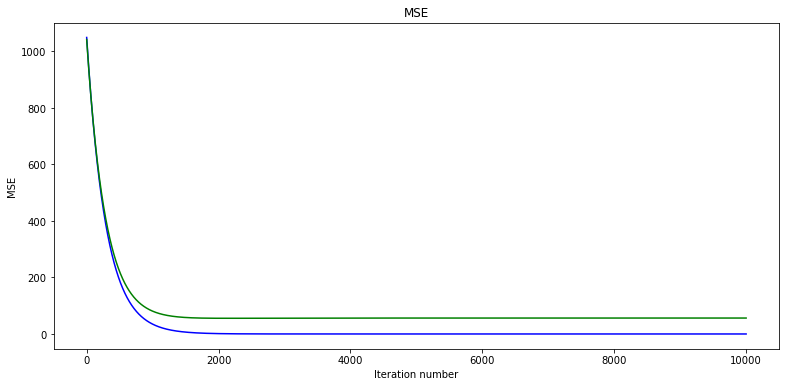

In [30]:
plt.figure(figsize=(13, 6))
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.plot(grad_errors, c = 'b')
plt.plot(grad_errors_L1, c = 'g')

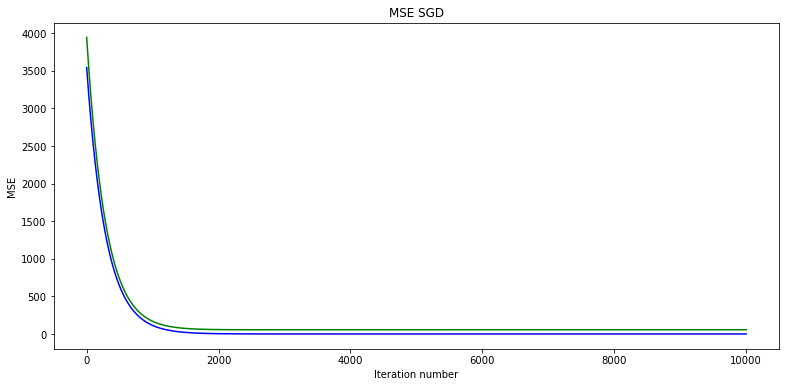

In [31]:
plt.figure(figsize=(13, 6))
plt.title('MSE SGD')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.plot(errors_sgd, c = 'b')
plt.plot(errors_sgd_L1, c = 'g')